# Data Analysis con Pandas


$ \textbf{pandas} $ è un potente strumento per la data analysis ed è diventato il package centrale nel cosiddetto "PyData stack".

La sua classe $ \textbf{DataFrame}$ è particolarmente adatta per lavorare con tabular data di qualsiasi tipo.

Molte delle operazioni con tali oggetti sono "vectorized", consentendo un'alta efficienza delle prestazioni. Inoltre, $ \textbf{pandas} $ rende conveniente lavorare con data set incompleti (cosa che non è possibile fare in $ \textbf{NumPy} $ ). 

In questo notebook mostriamo le seguenti due  strutture dati fondamentali:

    - DataFrame: oggetto bidimensionale con indici (dati tabulari organizzati in colonne).
    - Series: oggetto monodimensionale con indice.


## La Classe DataFrame

### Primi passi ...

In [2]:
import pandas as pd   # importiamo pandas

In [3]:
df = pd.DataFrame(data=[10, 20, 30, 40],           # definiamo i dati come oggetto lista
                  columns=['numeri'],         # specifichiamo la label delle colonne
                  index=['a', 'b', 'c', 'd']) # specifichiamo gli index values/labels

In [4]:
df   # mostra i dati come pure le colonne e gli index labels del DataFrame

,numeri
a,10
b,20
c,30
d,40


Il semplice esempio appena visto mostra alcune delle caratteristiche principali della classe DataFrame:
    - I dati possono essere forniti in differenti "shapes" e tipi (liste, tuple, ndarray, dizionari).
    - I dati sono organizzati in colonne con labels.
    - C'è un indice che può avere formati differenti (e.g., numeri, stringhe, time-information). 


In [5]:
df.shape

(4, 1)

In [4]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns

Index(['numeri'], dtype='object')

In [6]:
df.loc['c']     # seleziona il valore corrispondente all'indice c 

numeri    30
Name: c, dtype: int64

In [7]:
df.loc[['c']]     # seleziona la terza riga mediante label

,numeri
c,30


In [8]:
df.loc[['a', 'd']]  # seleziona la prima e la quarta riga mediante labels 

,numeri
a,10
d,40


In [9]:
df.iloc[1:3]   # seleziona la seconda e la terza riga mediante indice numerico

,numeri
b,20
c,30


In [10]:
df.sum()   # calcola la somma della singola colonna

numeri    100
dtype: int64

In [11]:
df.apply(lambda x: x **2)   # usa il metodo apply() per calcolare i quadrati in modo vectorized

,numeri
a,100
b,400
c,900
d,1600


In [12]:
df ** 2   # applica direttamente la vectorization come accade per gli ndarray

,numeri
a,100
b,400
c,900
d,1600


Contrariamente a ciò che accade per gli ndarray di NumPy, è possibile effettuare un ampliamento ("enlarging") di un oggetto DataFrame in entrambe le dimensioni:

In [13]:
# aggiunge una colonna con oggetti floats forniti nella forma di tupla
df['floats'] = (1.5, 2.5, 3.5, 4.5)  

In [14]:
df

,numeri,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [15]:
df['floats']   # seleziona la colonna "floats" e mostra i suoi dati con i relativi indici

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

Per definire una nuova colonna possiamo anche utilizzare un intero DataFrame. In tal caso gli indici sono automaticamente allineati:

In [16]:
# Creiamo una nuova colonna "nomi" basata su un oggetto DataFrame
df['nomi'] = pd.DataFrame(['Marco', 'Laura', 'Paolo', 'Silvia'],
                        index=['d', 'a', 'b', 'c'])

In [17]:
df

,numeri,floats,nomi
a,10,1.5,Laura
b,20,2.5,Paolo
c,30,3.5,Silvia
d,40,4.5,Marco


L'appending di dati lavora in modo simile. Tuttavia, nell'esempio seguente si verifica un side effect che in genere andrebbe evitato - gli indici sono sostituiti da un semplice *range index*:

In [18]:
# append di una nuova riga fornita sotto forma di dizionario
df.append({'numeri': 100, 'floats': 5.75, 'nomi': 'Pietro'},
         ignore_index=True)

,numeri,floats,nomi
0,10,1.50,Laura
1,20,2.50,Paolo
2,30,3.50,Silvia
3,40,4.50,Marco
4,100,5.75,Pietro


In [19]:
df

,numeri,floats,nomi
a,10,1.5,Laura
b,20,2.5,Paolo
c,30,3.5,Silvia
d,40,4.5,Marco


In [20]:
# Facendo l'append di una riga fornita come DataFrame con index information, 
# gli indici originari vengono preservati

df = df.append(pd.DataFrame({'numeri': 100, 'floats': 5.75, 'nomi': 'Pietro'},
         index=['y',]))

In [21]:
df

,numeri,floats,nomi
a,10,1.50,Laura
b,20,2.50,Paolo
c,30,3.50,Silvia
d,40,4.50,Marco
y,100,5.75,Pietro


In [22]:
# un append con riga incompleta comporta l'inserimento di valori NaN
df = df.append(pd.DataFrame({'nomi': 'Francesca'},
         index=['e',]),
         sort=False)

In [23]:
df

,numeri,floats,nomi
a,10.0,1.50,Laura
b,20.0,2.50,Paolo
c,30.0,3.50,Silvia
d,40.0,4.50,Marco
y,100.0,5.75,Pietro
e,NaN,NaN,Francesca


In [24]:
df.dtypes   # restituisce i tipi delle singole colonne

numeri    float64
floats    float64
nomi       object
dtype: object

Nonostante nel DataFrame df sopra definito ci siano "missing values", la maggior parte delle chiamate a metodi è ancora possibile: 

In [25]:
# Calcolo della media delle due colonne specificate 
# (si ignorano le righe con NaN)
df[['numeri', 'floats']].mean()  

numeri    40.00
floats     3.55
dtype: float64

In [26]:
# Calcolo della deviazione standard delle due colonne specificate 
# (si ignorano le righe con NaN)
df[['numeri', 'floats']].std()

numeri    35.355339
floats     1.662077
dtype: float64

## ... passi successivi

L'esempio presentato qui di seguito è basato su un oggetto ndarray con numeri casuali distribuiti normalmente.

In [27]:
import numpy as np

In [28]:
np.random.seed(100)

In [29]:
a = np.random.standard_normal((9, 4))

In [30]:
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [31]:
type(a)

numpy.ndarray

In [32]:
df = pd.DataFrame(a)  # crea un DataFrame a partire da un oggetto ndarray

In [33]:
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


I nomi delle colonne degli oggetti DataFrame possono essere definiti direttamente assegnando una lista con il giusto numero di elementi:

In [34]:
# specifica le label delle colonne mediante una lista
df.columns = ['No1', 'No2', 'No3', 'No4',]

In [35]:
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [36]:
# ora è facile selezionare una singola colonna (ad esempio per il calcolo della media)
df['No2'].mean()

0.701033094145646

Uno dei principali punti di forza di pandas è la possibilità di gestire i "time indices".

Ad esempio, assumiamo che i nostri dati nelle quattro colonne di df corrispondano alla fine di ogni mese, cominciando da gennaio 2022. Possiamo generare un oggetto "DatetimeIndex" mediante la funzione date_range() come segue:

In [37]:
# creiamo un oggetto DatetimeIndex
dates = pd.date_range('2022-1-1', periods=9, freq='M')

In [38]:
dates

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [39]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [40]:
df.index = dates   # poniamo le date come index values

In [41]:
df

,No1,No2,No3,No4
2022-01-31,-1.749765,0.342680,1.153036,-0.252436
2022-02-28,0.981321,0.514219,0.221180,-1.070043
2022-03-31,-0.189496,0.255001,-0.458027,0.435163
2022-04-30,-0.583595,0.816847,0.672721,-0.104411
2022-05-31,-0.531280,1.029733,-0.438136,-1.118318
2022-06-30,1.618982,1.541605,-0.251879,-0.842436
2022-07-31,0.184519,0.937082,0.731000,1.361556
2022-08-31,-0.326238,0.055676,0.222400,-1.443217
2022-09-30,-0.756352,0.816454,0.750445,-0.455947


In alcune circostanze, può essere utile poter accedere al data set originale nella forma di oggetto ndarray.

L'attributo "value" fornisce un accesso diretto ad esso: 

In [42]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [43]:
type(df.values)

numpy.ndarray

In [44]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

## Basic Analytics

Come per la classe ndarray di NumPy, la classe DataFrame ha un gran numero di metodi built-in.

Ad esempio i metodi info() e describe():

In [45]:
df.info()   # metainformazioni su dati, colonne e indici

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2022-01-31 to 2022-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [46]:
df.describe()  # informazioni statistiche per colonna (per dati numerici)

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


Inoltre, è possibile ottenere la somma, la media, la somma cumulativa sia per colonna sia per riga:

In [47]:
df.sum()   # somma colonna per colonna

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [48]:
df.mean()  # media colonna per colonna

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [49]:
df.mean(axis=0)   # media colonna per colonna

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [50]:
df.mean(axis=1)   # media riga per riga

2022-01-31   -0.126621
2022-02-28    0.161669
2022-03-31    0.010661
2022-04-30    0.200390
2022-05-31   -0.264500
2022-06-30    0.516568
2022-07-31    0.803539
2022-08-31   -0.372845
2022-09-30    0.088650
Freq: M, dtype: float64

In [51]:
df.sum(axis=1)   # somma riga per riga

2022-01-31   -0.506485
2022-02-28    0.646676
2022-03-31    0.042642
2022-04-30    0.801562
2022-05-31   -1.058002
2022-06-30    2.066272
2022-07-31    3.214157
2022-08-31   -1.491379
2022-09-30    0.354600
Freq: M, dtype: float64

In [52]:
df.cumsum()  # somma cumulativa colonna per colonna (a partire dal primo indice)

,No1,No2,No3,No4
2022-01-31,-1.749765,0.342680,1.153036,-0.252436
2022-02-28,-0.768445,0.856899,1.374215,-1.322479
2022-03-31,-0.957941,1.111901,0.916188,-0.887316
2022-04-30,-1.541536,1.928748,1.588909,-0.991727
2022-05-31,-2.072816,2.958480,1.150774,-2.110045
2022-06-30,-0.453834,4.500086,0.898895,-2.952481
2022-07-31,-0.269316,5.437168,1.629895,-1.590925
2022-08-31,-0.595554,5.492844,1.852294,-3.034142
2022-09-30,-1.351906,6.309298,2.602739,-3.490089


Gli oggetti DataFrame accettano anche le funzioni universali NumPy:

In [53]:
np.mean(df)   # media colonna per colonna

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [54]:
np.log(df)   # logaritmo naturale elemento per elemento

,No1,No2,No3,No4
2022-01-31,NaN,-1.070957,0.142398,NaN
2022-02-28,-0.018856,-0.665106,-1.508780,NaN
2022-03-31,NaN,-1.366486,NaN,-0.832033
2022-04-30,NaN,-0.202303,-0.396425,NaN
2022-05-31,NaN,0.029299,NaN,NaN
2022-06-30,0.481797,0.432824,NaN,NaN
2022-07-31,-1.690005,-0.064984,-0.313341,0.308628
2022-08-31,NaN,-2.888206,-1.503279,NaN
2022-09-30,NaN,-0.202785,-0.287089,NaN


In [55]:
np.sqrt(abs(df))   # radice quadrata dei valori assoluti, elemento per elemento

,No1,No2,No3,No4
2022-01-31,1.322787,0.585389,1.073795,0.502430
2022-02-28,0.990616,0.717091,0.470297,1.034429
2022-03-31,0.435311,0.504977,0.676777,0.659669
2022-04-30,0.763934,0.903796,0.820196,0.323127
2022-05-31,0.728890,1.014757,0.661918,1.057506
2022-06-30,1.272392,1.241614,0.501876,0.917843
2022-07-31,0.429556,0.968030,0.854986,1.166857
2022-08-31,0.571173,0.235958,0.471593,1.201340
2022-09-30,0.869685,0.903578,0.866282,0.675238


In [56]:
np.sqrt(abs(df)).sum()  # somma per colonne delle radici quadrate 

No1    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [57]:
100 * df + 100   # trasformazione lineare di dati numerici

,No1,No2,No3,No4
2022-01-31,-74.976547,134.268040,215.303580,74.756396
2022-02-28,198.132079,151.421884,122.117967,-7.004333
2022-03-31,81.050417,125.500144,54.197301,143.516349
2022-04-30,41.640495,181.684707,167.272081,89.558886
2022-05-31,46.871962,202.973269,56.186438,-11.831825
2022-06-30,261.898166,254.160517,74.812086,15.756426
2022-07-31,118.451869,193.708220,173.100034,236.155613
2022-08-31,67.376194,105.567601,122.239961,-44.321700
2022-09-30,24.364769,181.645401,175.044476,54.405307


## Visualizzazioni di Base

Il disegno di grafici si può ottenere con una riga di codice se i dati sono rappresentati in un DataFrame:

In [58]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

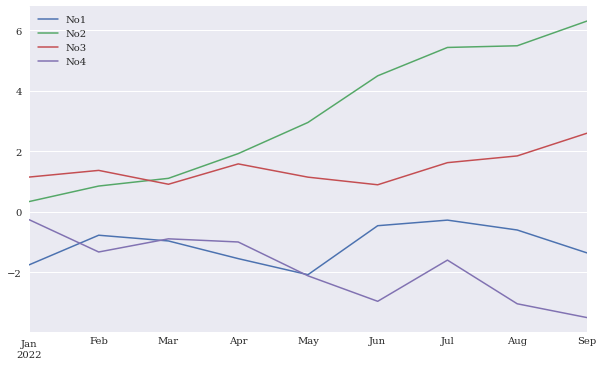

In [59]:
# Grafico delle somme cumulative delle quattro colonne di df
df.cumsum().plot(lw=1.5, figsize=(10,6));

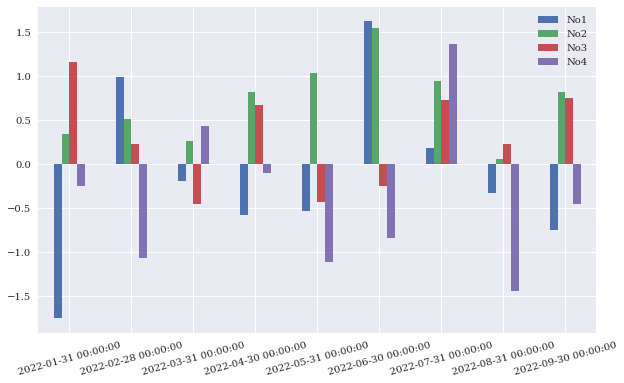

In [67]:
# disegno del grafico a barre mediante .plot.bar()
df.plot.bar(figsize=(10,6), rot=15);

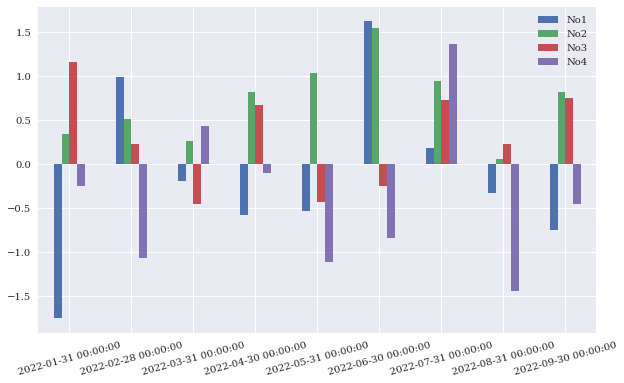

In [68]:
# grafico a barre mediante sintassi alternativa
df.plot(kind='bar', figsize=(10, 6), rot=15);

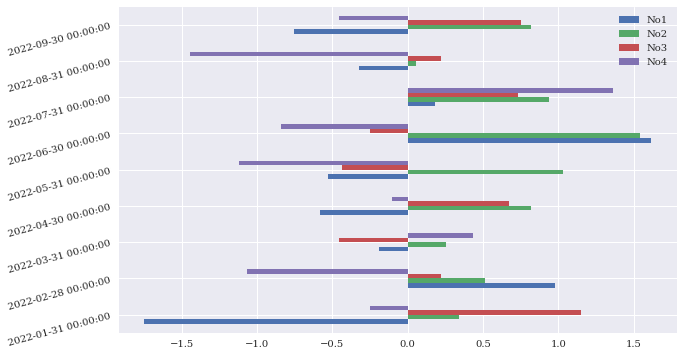

In [69]:
df.plot(kind='barh', figsize=(10, 6), rot=15);

## La Classe Series

Series è un'altra importante classe disponibile in pandas. Essa è caratterizzata dal fatto che ha solo una colonna di dati.

Un oggetto Series può essere ottenuto quando si seleziona una singola colonna da un DataFrame con più colonne:

In [70]:
df

,No1,No2,No3,No4
2022-01-31,-1.749765,0.342680,1.153036,-0.252436
2022-02-28,0.981321,0.514219,0.221180,-1.070043
2022-03-31,-0.189496,0.255001,-0.458027,0.435163
2022-04-30,-0.583595,0.816847,0.672721,-0.104411
2022-05-31,-0.531280,1.029733,-0.438136,-1.118318
2022-06-30,1.618982,1.541605,-0.251879,-0.842436
2022-07-31,0.184519,0.937082,0.731000,1.361556
2022-08-31,-0.326238,0.055676,0.222400,-1.443217
2022-09-30,-0.756352,0.816454,0.750445,-0.455947


In [71]:
type(df)

pandas.core.frame.DataFrame

In [72]:
S = pd.Series(np.linspace(0, 15, 7), name='series')

In [73]:
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [74]:
type(S)

pandas.core.series.Series

In [75]:
s = df['No1']

In [76]:
s

2022-01-31   -1.749765
2022-02-28    0.981321
2022-03-31   -0.189496
2022-04-30   -0.583595
2022-05-31   -0.531280
2022-06-30    1.618982
2022-07-31    0.184519
2022-08-31   -0.326238
2022-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

In [77]:
type(s)

pandas.core.series.Series

I principali metodi per i DataFrame sono disponibili anche per gli oggetti Series.
Ad esempio:

In [78]:
s.mean()

-0.15021177307319458

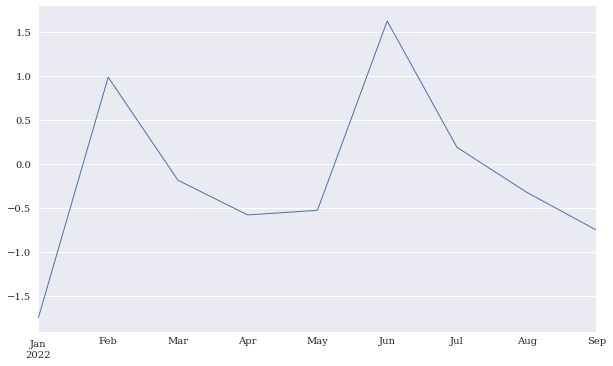

In [82]:
s.plot(lw=1.0, figsize=(10, 6));

## Operazioni GroupBy

In [83]:
# aggiungiamo a df una colonna "Quarter" come segue

df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']

In [84]:
df

,No1,No2,No3,No4,Quarter
2022-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2022-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2022-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2022-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2022-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2022-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2022-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2022-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2022-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [85]:
groups = df.groupby('Quarter') # raggruppiamo in base alla colonna "Quarter"

In [86]:
groups.size()  # numero di righe per ciascun gruppo

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [88]:
groups.mean()  # media per colonna

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [89]:
groups.max()  # massimo per colonna

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [90]:
groups.aggregate([min, max]).round(2) # min e max per colonna

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

Il "grouping" può essere fatto anche per più colonne. 

A tal fine, si può introdurre nel nostro esempio un'altra colonna, i cui valori indicano ad esempio se il mese nella "index date" è pari o dispari:

In [91]:
df['Dispari_Pari'] = ['Dispari', 'Pari', 'Dispari', 'Pari', 'Dispari', 'Pari', 'Dispari', 'Pari', 'Dispari']

In [92]:
df

,No1,No2,No3,No4,Quarter,Dispari_Pari
2022-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1,Dispari
2022-02-28,0.981321,0.514219,0.221180,-1.070043,Q1,Pari
2022-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1,Dispari
2022-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2,Pari
2022-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2,Dispari
2022-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2,Pari
2022-07-31,0.184519,0.937082,0.731000,1.361556,Q3,Dispari
2022-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3,Pari
2022-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3,Dispari


In [93]:
groups = df.groupby(['Quarter', 'Dispari_Pari'])

In [94]:
groups.size()

Quarter  Dispari_Pari
Q1       Dispari         2
         Pari            1
Q2       Dispari         1
         Pari            2
Q3       Dispari         2
         Pari            1
dtype: int64

In [95]:
groups[['No1', 'No4']].aggregate([sum, np.mean]).round(2)

No1         No4      
                       sum  mean   sum  mean
Quarter Dispari_Pari                        
Q1      Dispari      -1.94 -0.97  0.18  0.09
        Pari          0.98  0.98 -1.07 -1.07
Q2      Dispari      -0.53 -0.53 -1.12 -1.12
        Pari          1.04  0.52 -0.95 -0.47
Q3      Dispari      -0.57 -0.29  0.91  0.45
        Pari         -0.33 -0.33 -1.44 -1.44

## Selezione Complessa

Spesso la selezione dei dati viene effettuata mediante la formulazione di condizioni sui valori delle colonne, ed eventualmente combinando logicamente tali condizioni multiple.

Consideriamo il seguente data set:

In [96]:
# Oggetto ndarray con numeri casuali con distribuzione normale
data = np.random.standard_normal((10, 2))

In [97]:
data

array([[ 1.18962227, -1.69061683],
       [-1.35639905, -1.23243451],
       [-0.54443916, -0.66817174],
       [ 0.00731456, -0.61293874],
       [ 1.29974807, -1.73309562],
       [-0.9833101 ,  0.35750775],
       [-1.6135785 ,  1.47071387],
       [-1.1880176 , -0.54974619],
       [-0.94004616, -0.82793236],
       [ 0.10886347,  0.50780959]])

In [98]:
# Oggetto DataFrame con gli stessi numeri casuali di data
df = pd.DataFrame(data, columns=['x', 'y'])

In [99]:
df

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [100]:
df.head()  # con il metodo "head" si ottengono le prime cinque righe

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [101]:
df.tail()  # con il metodo "tail" si ottengono le ultime cinque righe

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


Negli esempi seguenti illustriamo delle applicazioni di operatori di comparazione e operatori logici sui valori delle due colonne:

In [102]:
df['x'] > 0.5 # valuta se ciscuno dei valori della colonna x è maggiore di 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [103]:
(df['x'] > 0) & (df['y'] < 0) # and

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [104]:
(df['x'] > 0) | (df['y'] < 0) # or

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

Se si usano i risultati delle Series booleane, la selezione di righe è molto semplice. Alternativamente, possiamo usare il metodo *query()* passando le condizioni come stringhe.


In [105]:
df[df['x'] > 0]   # selezione di righe mediante "Series" booleane

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [106]:
df.query('x > 0')  # selezione di righe mediante il metodo query()

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [107]:
df[(df['x'] > 0) & (df['y'] < 0)]  # selezione di righe mediante "Series" booleane

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [108]:
df.query('x > 0 & y < 0')  # selezione di righe mediante il metodo query()

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [109]:
df[(df.x > 0) & (df.y < 0)] 

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [110]:
df[(df.x > 0) | (df.y < 0)] 

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


Gli operatori di comparazione possono essere applicati contemporaneamente anche su un completo DataFrame:

In [111]:
df > 0

,x,y
0,True,False
1,False,False
2,False,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,False
8,False,False
9,True,True


In [112]:
df[df > 0] # seleziona tali valori e imposta a NaN nelle altre posizioni

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


## Cancellazione di righe e colonne

In [ ]:
df1 = pd.DataFrame(np.arange(12).reshape(3, 4),
                    columns=['No1', 'No2', 'No3', 'No4'],
                   index=['a', 'b', 'c'])

In [ ]:
df1

In [ ]:
# cancellazione di colonne
df1.drop(['No2', 'No4'], axis=1)

In [ ]:
df1

In [ ]:
# cancellazione righe per indice
df1.drop(['a', 'c'], axis=0)

In [ ]:
df1

In [ ]:
df1.drop(['a', 'c'])

In [ ]:
df1

In [ ]:
del[df1['No4']]

In [ ]:
df1

## Concatenazione, Joining e Merging

In questa sezione mostriamo differenti approcci per combinare due semplici data sets (df1 e df2) nella forma di oggetti DataFrame:

In [ ]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                   index=['a', 'b', 'c', 'd'],
                   columns=['A',])

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame(['200', '150', '50'],
                   index=['f', 'b', 'd'],
                   columns=['B',])

In [ ]:
df2

### Concatenazione

Concatenation o appending in sostanza significa che delle righe vengono aggiunte da un DataFrame a un altro.  Ciò può essere ottenuto mediante il metodo append() o mediante la funzione pd.concat().

In [ ]:
# append dei dati di df2 in df1 come nuove righe
df1.append(df2, sort=False) 

In [ ]:
# lo stesso di prima ma ignora gli indici
df1.append(df2, ignore_index=True, sort=False)


In [ ]:
# ha lo stesso effetto della prima append
pd.concat((df1, df2), sort=False)

In [ ]:
# ha lo stesso effetto della seconda append
pd.concat((df1, df2), ignore_index=True, sort=False)

### Joining

In [ ]:
df1.join(df2)  # left join (sono usati solo gli indici del primo DataFrame)

In [ ]:
df2.join(df1)   # left join (sono usati solo gli indici del primo DataFrame)

In [ ]:
df1.join(df2, how='left') 

In [ ]:
df1.join(df2, how='right') 



In [ ]:
df1.join(df2, how='inner')  # l'inner join preserva gli indici comuni 

In [ ]:
df1.join(df2, how='outer')  # l'outer join preserva i valori di entrambi gli indici 

Si può anche avere un join basato su un oggetto DataFrame vuoto:

In [ ]:
df = pd.DataFrame()

In [ ]:
df

In [ ]:
df['A'] = df1['A']  # df1 come prima colonna A

In [ ]:
df

In [ ]:
df['B'] = df2   # df2 come seconda colonna B

In [ ]:
df

L'uso di un dizionario per combinare data sets consente di ottenere un risultato simile al quello dell'outer join poiché le colonne sono create "simultaneamente":

In [ ]:
# le colonne degli oggetti DataFrame sono usati come valori nell'oggetto dizionario.
df = pd.DataFrame({'A': df1['A'], 'B': df2['B']})

In [ ]:
df

### Merging

Mentre l'operazione join ha luogo sugli indici dei DataFrame coinvolti, l'operazione merge ha luogo su una colonna condivisa tra i due data sets.

Ad esempio, aggiungiamo una colonna C ai due DataFrame precedenti:

In [ ]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])

In [ ]:
c

In [ ]:
df1['C'] = c
df1

In [ ]:
df2['C'] = c
df2

Per default, l'operazione merge in questo caso ha luogo basandosi su una singola colonna condivisa C:

In [ ]:
pd.merge(df1, df2)

In [ ]:
pd.merge(df1, df2, on='C')

In [ ]:
# è possibile un outer merge, che preserva tutte le righe
pd.merge(df1, df2, how='outer')

Sono possibili tanti altri tipi di operazione merge. Vedi i riferimenti.

## Riferimenti

McKinney, W. and the Pandas Development Team "pandas: powerful Python data analysis toolkit", release 1.2.3, 02 marzo 2021 (http://pandas.pydata.org/ ).

Hilpisch, Y. Python for Finance, 2nd edition, O’Reilly, 2019.
